Fold 1 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


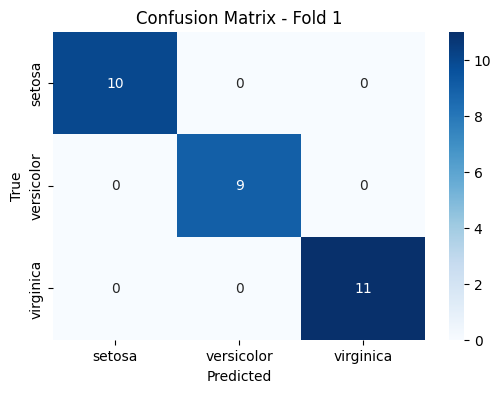

Fold 2 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


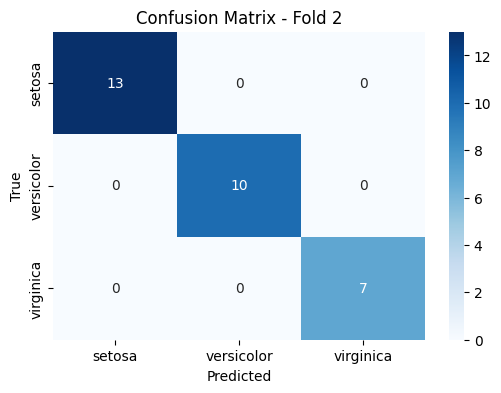

Fold 3 Results:
Accuracy: 0.9667
Precision: 0.9704
Recall: 0.9667
F1-score: 0.9668


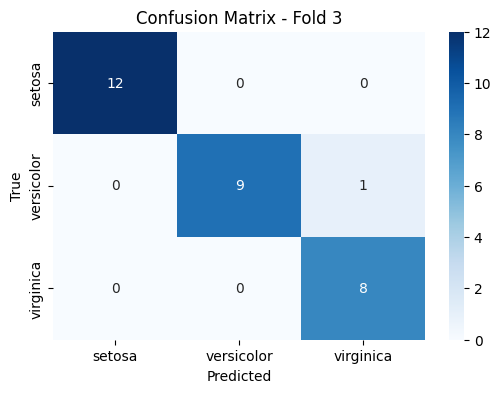

Fold 4 Results:
Accuracy: 0.9333
Precision: 0.9429
Recall: 0.9333
F1-score: 0.9322


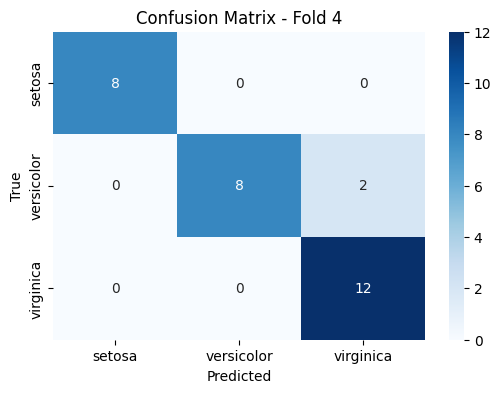

Fold 5 Results:
Accuracy: 0.9667
Precision: 0.9694
Recall: 0.9667
F1-score: 0.9667


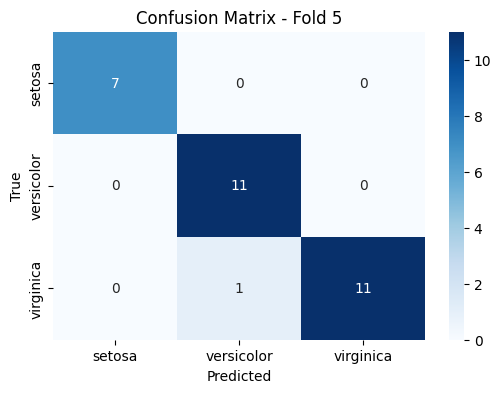

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score
from collections import Counter

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN class
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = KNN(k=5)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    accuracy = accuracy_score(y_test, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    conf_matrix = confusion_matrix(y_test, preds)

    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()
